# Bulk tutorial: Protein-Protein interaction (PPI) analysis by String-db
STRING is a database of known and predicted protein-protein interactions. The interactions include direct (physical) and indirect (functional) associations; they stem from computational prediction, from knowledge transfer between organisms, and from interactions aggregated from other (primary) databases.

Here we produce a tutorial that use python to construct protein-protein interaction network

In [13]:
import Pyomic
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import Pyomic
%matplotlib inline
plt.rc('font', family="Arial")  

## Prepare data

Here we use the example data of string-db to perform the analysis 

FAA4 and its ten most confident interactors.
FAA4 in yeast is a long chain fatty acyl-CoA synthetase; see it connected to other synthetases as well as regulators.

Saccharomyces cerevisiae
NCBI taxonomy Id: 4932
Other names: ATCC 18824, Candida robusta, NRRL Y-12632, S. cerevisiae, Saccharomyces capensis, Saccharomyces italicus, Saccharomyces oviformis, Saccharomyces uvarum var. melibiosus, lager beer yeast, yeast

In [19]:
gene_list=['FAA4','POX1','FAT1','FAS2','FAS1','FAA1','OLE1','YJU3','TGL3','INA1','TGL5']

## STRING interaction analysis

The network API method also allows you to retrieve your STRING interaction network for one or multiple proteins in various text formats. It will tell you the combined score and all the channel specific scores for the set of proteins. You can also extend the network neighborhood by setting "add_nodes", which will add, to your network, new interaction partners in order of their confidence.

In [20]:
G_res=Pyomic.bulk.string_interaction(gene_list,4932)
G_res.head()

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,4932.YBR041W,4932.YKL182W,FAT1,FAS1,4932,0.69,0,0,0,0,0,0,0.69
1,4932.YBR041W,4932.YKL182W,FAT1,FAS1,4932,0.69,0,0,0,0,0,0,0.69
2,4932.YBR041W,4932.YPL231W,FAT1,FAS2,4932,0.692,0,0,0,0,0,0,0.692
3,4932.YBR041W,4932.YPL231W,FAT1,FAS2,4932,0.692,0,0,0,0,0,0,0.692
4,4932.YBR041W,4932.YOR081C,FAT1,TGL5,4932,0.7,0,0,0,0,0,0,0.7


## STRING PPI network 

We also can use `Pyomic.bulk.generate_G` to get the PPI network of `gene_list`

In [21]:
G=Pyomic.bulk.generate_G(gene_list,4932)

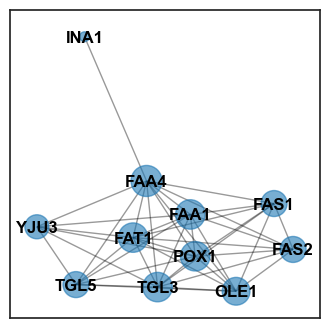

In [22]:
plt.figure(figsize=(4, 4))

np.random.seed(10)
pos = nx.spring_layout(G, scale=10, k=(len(gene_list)//8)/np.sqrt(G.order()))
d = dict(G.degree)
p=dict(G.nodes)

nx.draw_networkx_edges(G, pos, nodelist=[10], alpha=0.4)
degree_dict = dict(G.degree(G.nodes()))

nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=[degree_dict[v]*50 for v in G],
    alpha=0.6,
    linewidths=1,
)

nx.draw_networkx_labels(
    G,pos,verticalalignment='center_baseline',font_size=12,font_family='Arial',
    font_weight='bold',
)
plt.show()